## 1] Importing the neccessary modules for data manipulation and visual representation

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from zipfile import ZipFile

In [2]:
# Installing the Kaggle library
!pip install kaggle

In [3]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## 2] Importing the dataset

In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:08<00:00, 101MB/s]
100% 812M/812M [00:08<00:00, 95.4MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# Extracting the compressed dataset
Data = '/content/dogs-vs-cats.zip'
with ZipFile(Data, 'r') as zip:
  zip.extractall()

In [7]:
Data_train = '/content/train.zip'
with ZipFile(Data_train, 'r') as zip:
  zip.extractall()

In [8]:
# Counting the number of files in the train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


### Checking the Images of Cats & Dogs

In [9]:
Files = os.listdir('/content/train')
print(Files)

['dog.6341.jpg', 'dog.4215.jpg', 'cat.945.jpg', 'cat.6052.jpg', 'cat.1527.jpg', 'cat.8402.jpg', 'cat.5002.jpg', 'cat.96.jpg', 'cat.4708.jpg', 'cat.1497.jpg', 'cat.12169.jpg', 'dog.10921.jpg', 'dog.3735.jpg', 'dog.731.jpg', 'dog.380.jpg', 'dog.7433.jpg', 'dog.4736.jpg', 'dog.2668.jpg', 'cat.3810.jpg', 'cat.5236.jpg', 'cat.1090.jpg', 'dog.2983.jpg', 'dog.9914.jpg', 'dog.3187.jpg', 'cat.6242.jpg', 'cat.12174.jpg', 'cat.8815.jpg', 'cat.6982.jpg', 'cat.9297.jpg', 'cat.10579.jpg', 'cat.6975.jpg', 'dog.11794.jpg', 'dog.5528.jpg', 'cat.9122.jpg', 'cat.5640.jpg', 'cat.2144.jpg', 'cat.4816.jpg', 'cat.11640.jpg', 'dog.9810.jpg', 'cat.6247.jpg', 'dog.1473.jpg', 'dog.1610.jpg', 'cat.2733.jpg', 'dog.3184.jpg', 'dog.2120.jpg', 'dog.4945.jpg', 'cat.3180.jpg', 'dog.4114.jpg', 'cat.9614.jpg', 'cat.3202.jpg', 'cat.11412.jpg', 'dog.6862.jpg', 'dog.2691.jpg', 'dog.6470.jpg', 'dog.3869.jpg', 'dog.4944.jpg', 'cat.10566.jpg', 'dog.10348.jpg', 'dog.12115.jpg', 'cat.9429.jpg', 'dog.11809.jpg', 'cat.11922.jpg', 

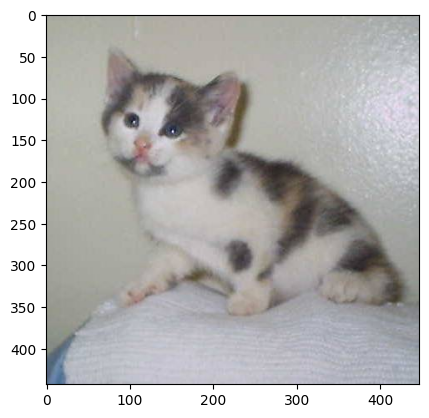

In [10]:
img = mpimg.imread('/content/train/cat.6052.jpg')
imgplt = plt.imshow(img)
plt.show()

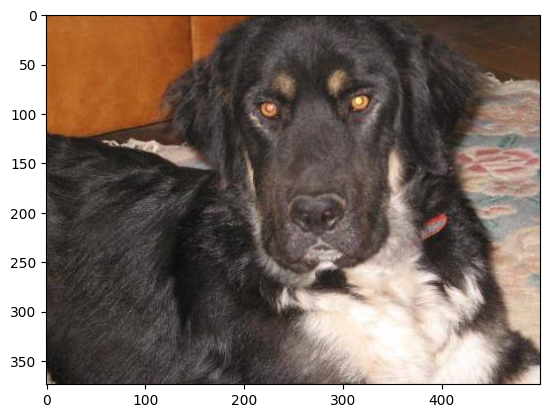

In [11]:
# Displaying cat image
img = mpimg.imread('/content/train/dog.6341.jpg')
imgplt = plt.imshow(img)
plt.show()

## 3] Resizing all the Images

In [12]:
from PIL import Image
import glob

In [13]:
# Creating another directory for resized images
os.mkdir('/content/Resized Images')

In [14]:
Original_img = '/content/train/'
Resized_img = '/content/Resized Images/'
for i in range(2000):
  filename = os.listdir(Original_img)[i]
  img_path = Original_img+filename
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')
  NewImgPath = Resized_img+filename
  img.save(NewImgPath)

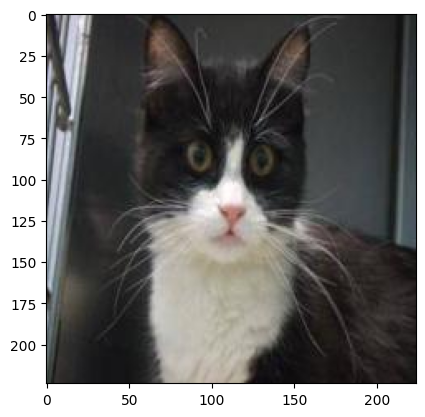

In [15]:
img = mpimg.imread('/content/Resized Images/cat.8110.jpg')
imgplt = plt.imshow(img)
plt.show()

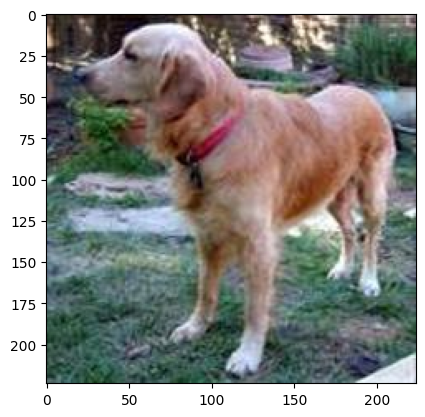

In [16]:
img = mpimg.imread('/content/Resized Images/dog.5721.jpg')
imgplt = plt.imshow(img)
plt.show()

### Creating labels for resized images


Cat --> 0

Dog --> 1

In [17]:
# Creating a for loop to assign labels
filenames = os.listdir('/content/Resized Images/')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [18]:
print(filenames[0:7])
print(labels[0:7])
print(len(labels))

['dog.6341.jpg', 'dog.4215.jpg', 'cat.945.jpg', 'cat.6052.jpg', 'cat.1527.jpg', 'cat.8402.jpg', 'cat.5002.jpg']
[1, 1, 0, 0, 0, 0, 0]
2000


In [19]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1029  971]


In [20]:
# Converting all the resized images to numpy arrays

image_directory = '/content/Resized Images/'
image_extension = ['png', 'jpg']
files = []
[files.extend(glob.glob(image_directory + '*.'+ e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [21]:
type(dog_cat_images)

numpy.ndarray

In [22]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


## 4] Model Building

In [23]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub

In [24]:
X = dog_cat_images
y = np.asarray(labels)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [26]:
print(X_train)

[[[[ 68  71 102]
   [ 71  74 105]
   [ 78  81 112]
   ...
   [ 32  35  56]
   [ 33  36  57]
   [ 33  36  57]]

  [[ 71  74 105]
   [ 72  75 106]
   [ 74  77 108]
   ...
   [ 32  35  56]
   [ 33  36  57]
   [ 33  36  57]]

  [[ 73  76 107]
   [ 71  74 105]
   [ 70  73 104]
   ...
   [ 34  35  55]
   [ 35  36  56]
   [ 35  36  56]]

  ...

  [[159 151 158]
   [173 165 172]
   [192 183 193]
   ...
   [157 149 142]
   [168 159 155]
   [168 159 155]]

  [[155 147 154]
   [127 119 126]
   [137 128 138]
   ...
   [176 168 161]
   [181 172 168]
   [173 164 160]]

  [[169 161 168]
   [143 135 142]
   [159 150 160]
   ...
   [196 188 181]
   [193 184 180]
   [177 168 164]]]


 [[[ 51  88 122]
   [ 44  81 115]
   [ 38  76 111]
   ...
   [114 114  84]
   [ 74  70  42]
   [100  93  66]]

  [[ 45  82 116]
   [ 39  76 110]
   [ 37  73 109]
   ...
   [115 115  85]
   [ 76  72  44]
   [101  94  67]]

  [[ 49  84 118]
   [ 40  75 109]
   [ 37  71 107]
   ...
   [119 119  89]
   [ 80  76  48]
   [104  97

In [27]:
X_train.max()

255

In [28]:
X_train.min()

0

In [29]:
# Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [30]:
print(X_train_scaled)

[[[[0.26666667 0.27843137 0.4       ]
   [0.27843137 0.29019608 0.41176471]
   [0.30588235 0.31764706 0.43921569]
   ...
   [0.1254902  0.1372549  0.21960784]
   [0.12941176 0.14117647 0.22352941]
   [0.12941176 0.14117647 0.22352941]]

  [[0.27843137 0.29019608 0.41176471]
   [0.28235294 0.29411765 0.41568627]
   [0.29019608 0.30196078 0.42352941]
   ...
   [0.1254902  0.1372549  0.21960784]
   [0.12941176 0.14117647 0.22352941]
   [0.12941176 0.14117647 0.22352941]]

  [[0.28627451 0.29803922 0.41960784]
   [0.27843137 0.29019608 0.41176471]
   [0.2745098  0.28627451 0.40784314]
   ...
   [0.13333333 0.1372549  0.21568627]
   [0.1372549  0.14117647 0.21960784]
   [0.1372549  0.14117647 0.21960784]]

  ...

  [[0.62352941 0.59215686 0.61960784]
   [0.67843137 0.64705882 0.6745098 ]
   [0.75294118 0.71764706 0.75686275]
   ...
   [0.61568627 0.58431373 0.55686275]
   [0.65882353 0.62352941 0.60784314]
   [0.65882353 0.62352941 0.60784314]]

  [[0.60784314 0.57647059 0.60392157]
   [0.4

In [31]:
X_train_scaled.max()

1.0

In [32]:
X_train_scaled.min()

0.0

### 4.1 Building the Neural Network

In [33]:
Mobilenet_Model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
Pretrained_Model = hub.KerasLayer(Mobilenet_Model, input_shape = (224,224,3), trainable = False)

In [34]:
Number_of_classes = 2
Model = tf.keras.Sequential([Pretrained_Model, tf.keras.layers.Dense(Number_of_classes)])

In [35]:
Model.compile(optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

In [36]:
Model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 92s 2s/step - loss: 0.1750 - accuracy: 0.9294
Epoch 2/10
50/50 [==============================] - 80s 2s/step - loss: 0.0681 - accuracy: 0.9750
Epoch 3/10
50/50 [==============================] - 82s 2s/step - loss: 0.0500 - accuracy: 0.9844
Epoch 4/10
50/50 [==============================] - 75s 2s/step - loss: 0.0382 - accuracy: 0.9862
Epoch 5/10
50/50 [==============================] - 74s 1s/step - loss: 0.0331 - accuracy: 0.9900
Epoch 6/10
50/50 [==============================] - 75s 1s/step - loss: 0.0256 - accuracy: 0.9956
Epoch 7/10
50/50 [==============================] - 74s 1s/step - loss: 0.0222 - accuracy: 0.9962
Epoch 8/10
50/50 [==============================] - 73s 1s/step - loss: 0.0189 - accuracy: 0.9981
Epoch 9/10
50/50 [==============================] - 75s 2s/step - loss: 0.0167 - accuracy: 0.9994
Epoch 10/10
50/50 [==============================] - 77s 2s/step - loss: 0.0145 - accuracy: 0.9994


In [38]:
loss, accuracy = Model.evaluate(X_test_scaled, y_test)
print('Test Loss =', loss)
print('Test Accuracy =', accuracy)

13/13 [==============================] - 20s 1s/step - loss: 0.0515 - accuracy: 0.9825
Test Loss = 0.05149794742465019
Test Accuracy = 0.9825000166893005


### 4.2 Building the Predictive System

In [40]:
from google.colab.patches import cv2_imshow

Path of the image to be predicted: /content/Cat-1.png


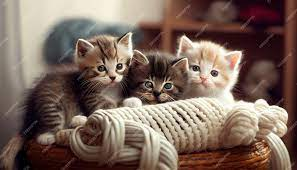

1/1 [==============================] - 0s 68ms/step
[[ 4.8440957 -5.482956 ]]
0
The image represents a Cat


In [48]:
input_image_path =  input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = Model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/Cat-2.png


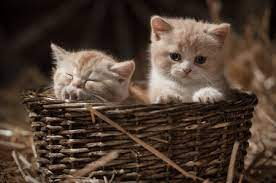

1/1 [==============================] - 0s 79ms/step
[[ 2.908815  -4.6456685]]
0
The image represents a Cat


In [49]:
input_image_path =  input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = Model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/Dog-1.jpg


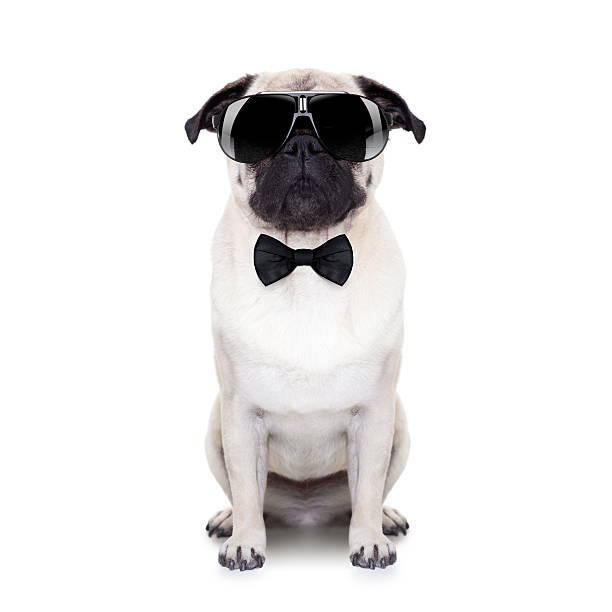

1/1 [==============================] - 0s 58ms/step
[[-3.0023787  3.5684118]]
1
The image represents a Dog


In [50]:
input_image_path =  input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = Model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/Dog-2.jpg


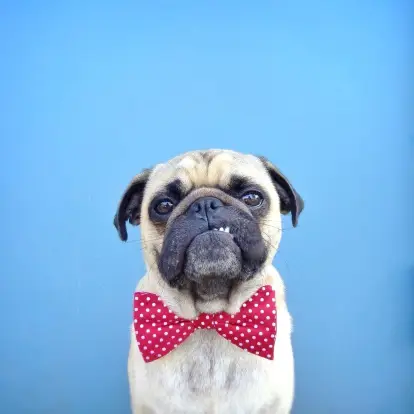

1/1 [==============================] - 0s 66ms/step
[[-1.6637301  1.4070721]]
1
The image represents a Dog


In [52]:
input_image_path =  input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = Model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')